loading data....................

creating wordcloud....................


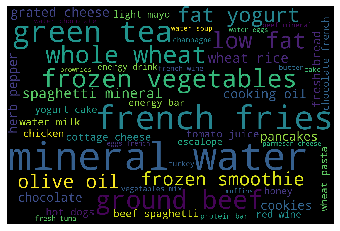


EDA loading....................


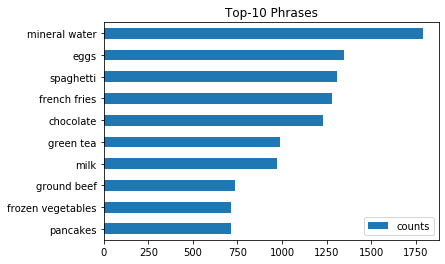

In [3]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

class MarketBasket_Exploration():
    def __init__(self, path, stop_word = None):
        self.data, self.cut_all_data, self.phrases = self.raw(path, stop_word)
        self.wc()
        self.eda()

    # 定义数据清洗
    def raw(self, path, stop_word):
        print('loading data' + '.' * 20)
        f = open(path, 'r')
        # 逗号分隔行、列
        all_data = ','.join(f.read().split('\n')).strip(',')
        # 去除停用词
        if stop_word != None:
            for x in stop_word:
                all_data = all_data.replace(x, '')
        # 分词至单词
        cut_all_data = word_tokenize(all_data.replace(',', ' '))
        # 分词至词组
        phrases = all_data.split(',')
        f.close()
        #print(all_data, cut_all_data, phrases, sep = '\n')
        return all_data, cut_all_data, phrases

    # 定义词云处理
    def wc(self):
        print('\n' + 'creating wordcloud' + '.' * 20)
        cut_all_data = ' '.join(self.cut_all_data)
        # 设置词云大小
        scale = WordCloud(max_words = 50, width = 1500, height = 1000)
        # 输出词云
        wordcloud = scale.generate(cut_all_data)
        #wordcloud.to_file('wordcloud.jpg')
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.show()

    # 定义Top-10可视化方法
    def eda(self):
        print('\n' + 'EDA loading' + '.' * 20)
        # 删除重复项
        dic_data = {}
        set_data = set(self.phrases)
        # 统计每项词组出现频率，并存入dict
        for x in set_data:
            dic_data[x] = self.phrases.count(x)
        # 转为DataFrame后排序
        df_phrases = pd.DataFrame.from_dict(dic_data, orient = 'index', columns = ['counts'])
        df_phrases.sort_values(by = 'counts', ascending = True, inplace = True)
        # 输出Barh图
        df_phrases.tail(10).plot(kind = 'barh', title = 'Top-10 Phrases')
        plt.show()

if __name__ == '__main__':
    mkt_bkt_exp = MarketBasket_Exploration('C:/Users/Administrator/Desktop/RS/L3Data/Market_Basket_Optimisation.csv', [])